# Exploratory Data Analysis for AqSolDB

In [1]:
# importing modules that will be used
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# load csv file as a pandas dataframe
df = pd.read_csv('aqsoldb.csv')

In [3]:
# inspect first five rows of dataframe
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [4]:
# quick look at summary statistics
df.describe()

,Solubility,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,-2.889909,0.067449,1.378081,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,467.336782
std,2.368154,0.234702,1.023476,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,546.631696
min,-13.171900,0.000000,1.000000,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000
25%,-4.326325,0.000000,1.000000,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,163.243343
50%,-2.618173,0.000000,1.000000,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,351.640433
75%,-1.209735,0.000000,1.000000,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.562848
max,2.137682,3.870145,38.000000,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

<AxesSubplot:xlabel='Solubility'>

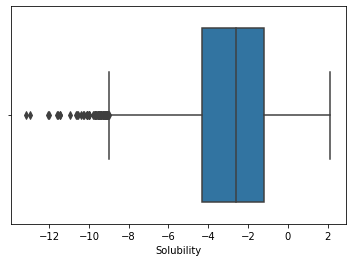

In [6]:
# box plot of solubility values to see spread of data
sns.boxplot(data=df, x='Solubility')

In [7]:
# finding outliers below lower whisker of plot
lower_whisker = df.Solubility.quantile(0.25) - 1.5 * (df.Solubility.quantile(0.75) - df.Solubility.quantile(0.25))
# lower whisker = -9.001210475837501
df[df.Solubility < -9.001210475837501]

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
1337,A-2319,"1,2-Benzenedicarboxylic acid, di-C9-11-branche...",InChI=1S/C28H46O4/c1-23(2)17-11-7-5-9-15-21-31...,ZVFDTKUVRCTHQE-UHFFFAOYSA-N,CC(C)CCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC(C)C,-9.419540,0.000000,1,G1,446.672,...,18.0,182.0,1.0,0.0,0.0,1.0,52.60,196.010264,2.264774e+00,581.074473
1362,A-2361,copper(2+) ion bis((9Z)-octadec-9-enoate),InChI=1S/2C18H34O2.Cu/c2*1-2-3-4-5-6-7-8-9-10-...,SVOAENZIOKPANY-CVBJKYQLSA-L,[Cu++].CCCCCCCC\C=C/CCCCCCCC([O-])=O.CCCCCCCC\...,-11.998938,0.000000,1,G1,626.466,...,30.0,245.0,0.0,0.0,0.0,0.0,80.26,265.645982,-6.876190e-07,523.927951
1694,A-2802,"2-(diphenyl-1,3,5-triazin-2-yl)-5-(hexyloxy)ph...",InChI=1S/C27H27N3O2/c1-2-3-4-11-18-32-22-16-17...,LEVFXWNQQSSNAC-UHFFFAOYSA-N,CCCCCCOc1ccc(c(O)c1)c2nc(nc(n2)c3ccccc3)c4ccccc4,-9.151811,0.000000,1,G1,425.532,...,9.0,162.0,4.0,0.0,0.0,4.0,68.13,188.359061,1.664156e+00,1090.416976
1695,A-2803,"(1E,19E)-10,11-dioctylicosa-1,19-diene-1,20-di...",InChI=1S/C72H139N/c1-3-5-7-9-11-13-15-17-19-21...,PNJSUECMZCQDCC-ONBHPNORSA-N,CCCCCCCCCCCCCCCCCCCC\C=C\C\C=C\CCCCCCCCCCCNCCC...,-9.707106,0.000000,1,G1,1018.911,...,66.0,432.0,0.0,0.0,0.0,0.0,12.03,463.441591,3.163329e+00,1049.879138
1696,A-2804,"1,2-bis(2-propylheptyl) benzene-1,2-dicarboxylate",InChI=1S/C28H46O4/c1-5-9-11-17-23(15-7-3)21-31...,MTYUOIVEVPTXFX-UHFFFAOYSA-N,CCCCCC(CCC)COC(=O)c1ccccc1C(=O)OCC(CCC)CCCCC,-9.649989,0.000000,1,G1,446.672,...,18.0,182.0,1.0,0.0,0.0,1.0,52.60,196.010264,2.695659e+00,585.074473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,G-117,"2,2',3,3',4,4',5,5',6,6'-PCB",InChI=1S/C12Cl10/c13-3-1(4(14)8(18)11(21)7(3)1...,ONXPZLFXDMAPRO-UHFFFAOYSA-N,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,-11.600000,0.369294,3,G5,498.662,...,1.0,118.0,2.0,0.0,0.0,2.0,0.00,175.521160,3.026914e+00,669.959814
9875,H-94,Decachlorodiphenyl ether,InChI=1S/C12Cl10O/c13-1-3(15)7(19)11(8(20)4(1)...,CIPFDHFTBYJKQB-UHFFFAOYSA-N,ClC1=C(Cl)C(Cl)=C(OC2=C(Cl)C(Cl)=C(Cl)C(Cl)=C2...,-12.950000,0.000000,1,G1,514.661,...,2.0,124.0,2.0,0.0,0.0,2.0,9.23,180.634705,2.712767e+00,690.954533
9882,H-219,"2,2',3,3',4,4',5-Heptachlorodiphenyl ether",InChI=1S/C12H3Cl7O/c13-4-1-2-6(10(17)8(4)15)20...,BLBURLWSCHSPIS-UHFFFAOYSA-N,ClC1=CC=C(OC2=CC(Cl)=C(Cl)C(Cl)=C2Cl)C(Cl)=C1Cl,-9.120000,0.000000,1,G1,411.326,...,2.0,106.0,2.0,0.0,0.0,2.0,9.23,149.724906,2.484946e+00,684.236547
9886,H-245,"1,2,3,4,7,8-Hexachlorodibenzofuran",InChI=1S/C12H2Cl6O/c13-4-1-3-6(2-5(4)14)19-12-...,LVYBAQIVPKCOEE-UHFFFAOYSA-N,ClC1=C(Cl)C=C2C(=C1)OC1=C(Cl)C(Cl)=C(Cl)C(Cl)=C21,-10.660000,0.020000,2,G3,374.865,...,0.0,98.0,3.0,0.0,0.0,3.0,13.14,137.408659,2.626370e+00,835.698900


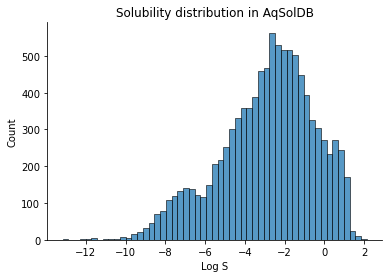

In [8]:
# histogram of solubility values to see spread of data
sns.histplot(data=df, x='Solubility').set_title('Solubility distribution in AqSolDB')
plt.xlabel('Log S')
sns.despine()
plt.savefig('solubility_distribution.jpg', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'The effect of molecular weight on solubility')

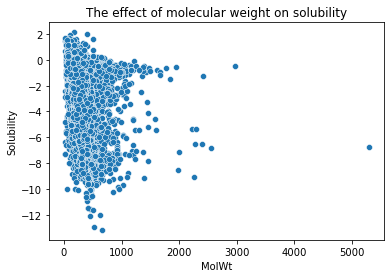

In [9]:
# Solubility vs MW
sns.scatterplot(data=df, x='MolWt', y='Solubility').set_title('The effect of molecular weight on solubility')
# plt.savefig('LogS_vs_MW.png', bbox_inches='tight')

In [10]:
df.loc[df['MolWt'] == 5299.456000]

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
1523,A-2592,"1,4-xylene 4-(methoxycarbonyl)benzoic acid 4-m...",InChI=1S/2C18H16O6.C17H12O5.3C17H16O4.C16H12O4...,DERNUBFICIQBEP-UHFFFAOYSA-N,COC(OC)c1ccc(cc1)C(=O)OC.COC(=O)c2ccccc2.COC(=...,-6.731678,0.0,1,G1,5299.456,...,57.0,2012.0,35.0,0.0,1.0,36.0,1214.34,2230.685124,3.087177e-07,20720.267708


In [11]:
# sns.pairplot(df)

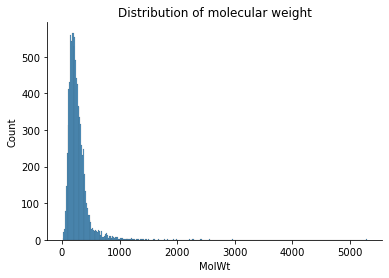

In [12]:
# histogram of molecular weight values to see spread of data
sns.histplot(data=df, x='MolWt').set_title('Distribution of molecular weight')
sns.despine()
plt.savefig('molwt_distribution.jpg', dpi=300, bbox_inches='tight')

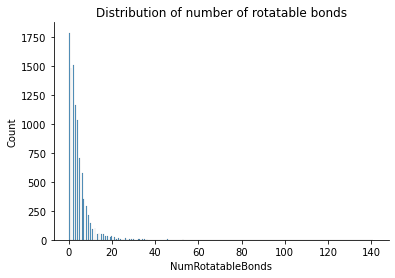

In [13]:
# histogram of number of rotatable bonds
sns.histplot(data=df, x='NumRotatableBonds').set_title('Distribution of number of rotatable bonds')
sns.despine()
plt.savefig('rotbonds_distribution.jpg', dpi=300, bbox_inches='tight')

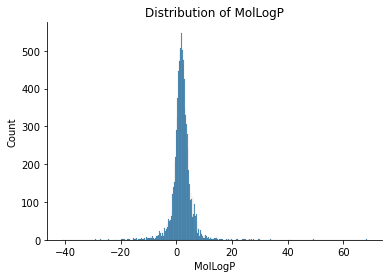

In [14]:
# histogram of MolLogP
sns.histplot(data=df, x='MolLogP').set_title('Distribution of MolLogP')
sns.despine()
plt.savefig('mollogp_distribution.jpg', dpi=300, bbox_inches='tight')